In [3]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load the dataset
data = pd.read_csv('C:/Users/amitk/Documents/Resume Projects/Kanerika_Project/sample_dataset.csv')

# Display the first few rows of the dataset to confirm its structure
data.head()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,1,5,629,2022,702,1,0,3,627,457528
1,2,2,2402,1972,251,1,1,3,705,78691
2,3,7,1547,1968,1224,3,0,1,282,316056
3,4,1,666,1937,2890,4,1,3,39,213285
4,5,9,2946,1985,768,2,1,4,848,304717


In [62]:
# Id column is a serial number hence it can be dropped
data.drop('ID', axis=1, inplace=True)
data.head()

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,5,629,2022,702,1,0,3,627,457528
1,2,2402,1972,251,1,1,3,705,78691
2,7,1547,1968,1224,3,0,1,282,316056
3,1,666,1937,2890,4,1,3,39,213285
4,9,2946,1985,768,2,1,4,848,304717


In [13]:
#Check if there is any missing value
data.info()
# We found no missing value and all the data points are integer value so no need for any datatype change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1000 non-null   int64
 1   GrLivArea    1000 non-null   int64
 2   YearBuilt    1000 non-null   int64
 3   TotalBsmtSF  1000 non-null   int64
 4   FullBath     1000 non-null   int64
 5   HalfBath     1000 non-null   int64
 6   GarageCars   1000 non-null   int64
 7   GarageArea   1000 non-null   int64
 8   SalePrice    1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [53]:
data.describe()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5.61700,1996.309000,1960.760000,1740.401000,2.506000,0.994000,2.038000,484.786000,270963.885000
std,288.819436,2.92076,883.054538,35.169351,1007.061464,1.135453,0.809085,1.406604,282.732658,129264.336981
min,1.000000,1.00000,500.000000,1900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,50363.000000
25%,250.750000,3.00000,1223.750000,1931.000000,838.750000,1.000000,0.000000,1.000000,239.000000,157806.750000
50%,500.500000,6.00000,1966.000000,1963.000000,1733.000000,3.000000,1.000000,2.000000,500.000000,268642.500000
75%,750.250000,8.00000,2800.000000,1991.000000,2599.500000,4.000000,2.000000,3.000000,705.500000,385333.250000
max,1000.000000,10.00000,3499.000000,2022.000000,3499.000000,4.000000,2.000000,4.000000,1000.000000,499208.000000


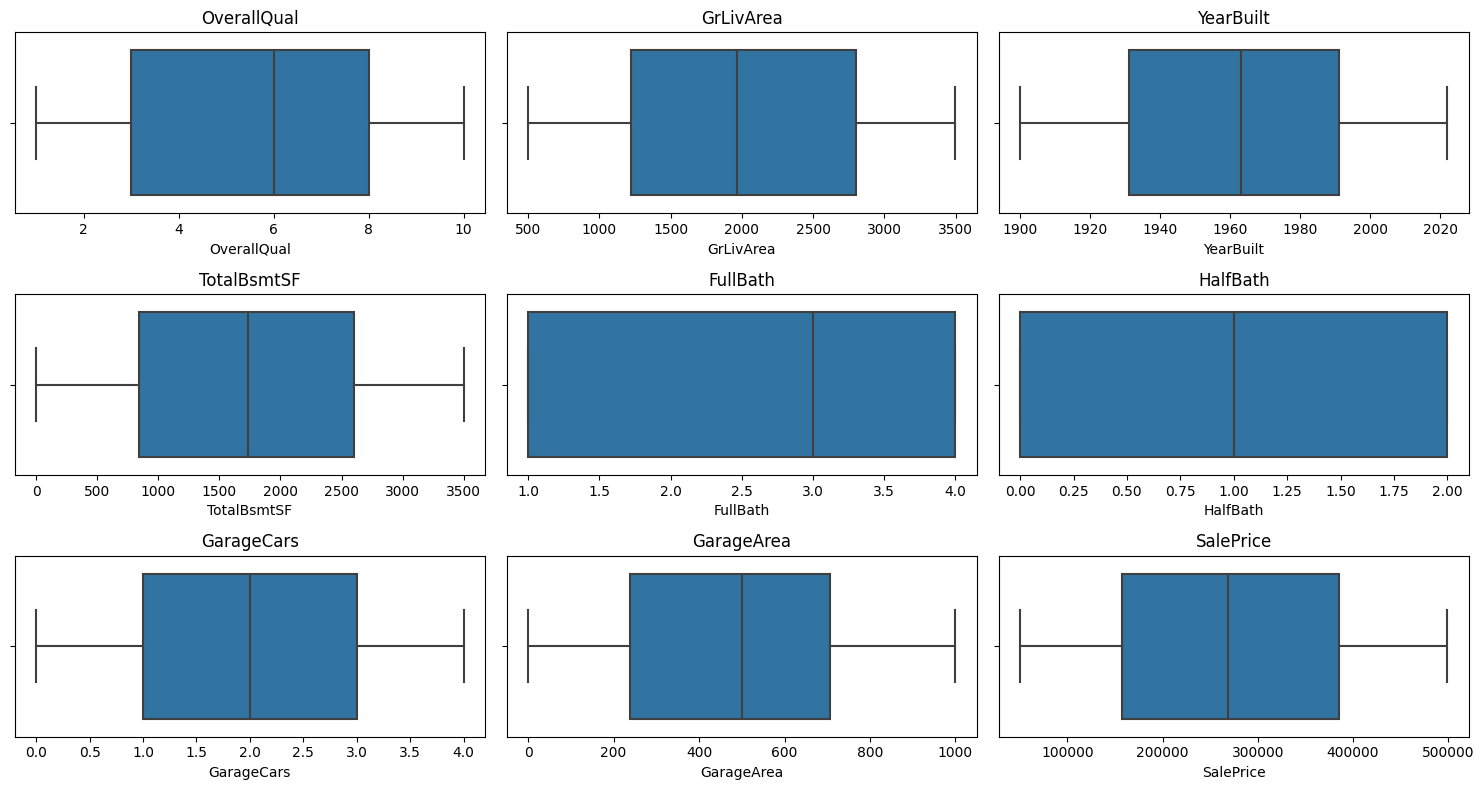

In [65]:

num_columns = data.select_dtypes(include=['int64', 'float64'])

# plot all box plots in a single 3x3 chart
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

# Flatten the array of axes for easy iteration
axs_flat = axs.flatten()

# Plot box plots for each numerical column in a 3x3 grid
for i, column in enumerate(num_columns):
    sns.boxplot(x=data[column], ax=axs_flat[i])
    axs_flat[i].set_title(column)

# Remove any unused axes (if the number of plots is less than 9)
for ax in axs_flat[len(num_columns):]:
    ax.remove()
    
    
plt.tight_layout()
plt.show()


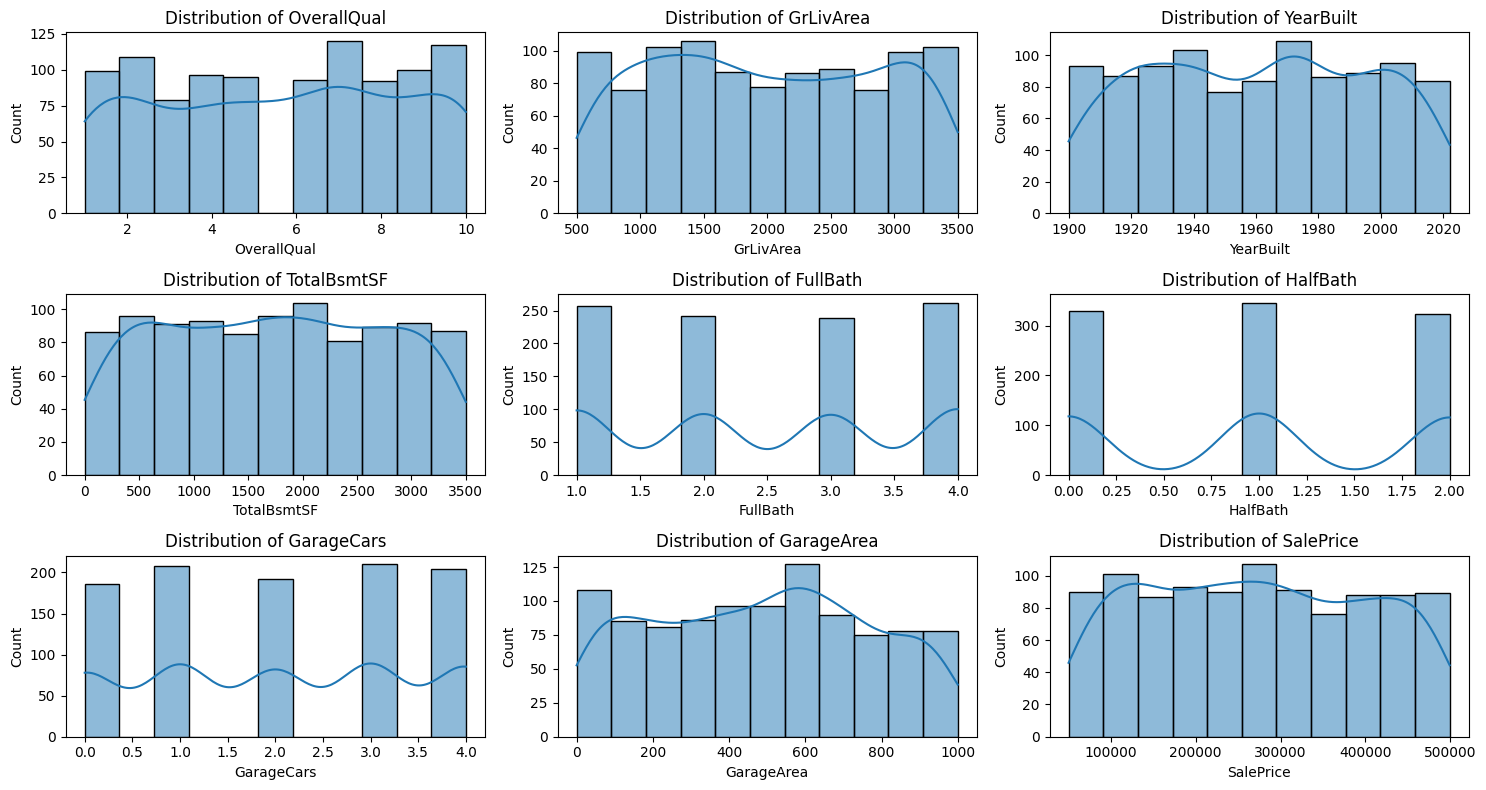

In [31]:
# plot all distribution plots in a single 3x3 chart
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

# Flatten the array of axes for easy iteration
axs_flat = axs.flatten()

# Plot distribution plots for each numerical column in a 3x3 grid
for i, column in enumerate(num_columns):
    sns.histplot(data[column], ax=axs_flat[i], kde=True)
    axs_flat[i].set_title(f'Distribution of {column}')

# Remove any unused axes (if the number of plots is less than 9)
for ax in axs_flat[len(num_columns):]:
    ax.remove()

plt.tight_layout()
plt.show()


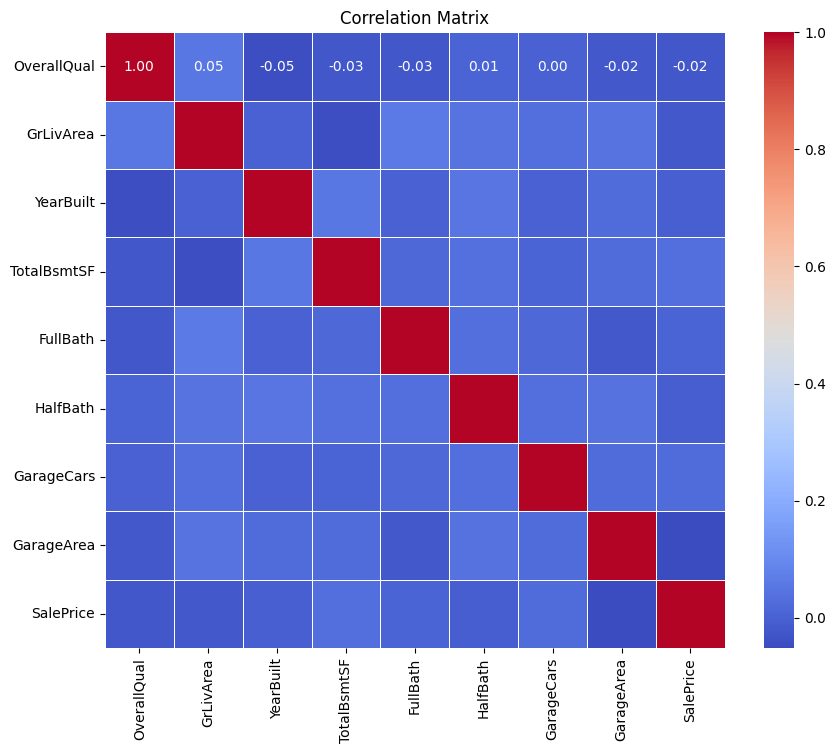

In [38]:
# Recalculate the correlation matrix for the dataset excluding outliers
correlation_matrix_no_outliers = data.drop('ID', axis=1).corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_no_outliers, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [41]:
correlation_matrix_df = pd.DataFrame(correlation_matrix_no_outliers.round(2))
# Display the DataFrame as a table
correlation_matrix_df

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
OverallQual,1.00,0.05,-0.05,-0.03,-0.03,0.01,0.00,-0.02,-0.02
GrLivArea,0.05,1.00,-0.00,-0.04,0.06,0.05,0.03,0.05,-0.02
YearBuilt,-0.05,-0.00,1.00,0.05,0.00,0.05,-0.00,0.03,-0.00
TotalBsmtSF,-0.03,-0.04,0.05,1.00,0.02,0.04,0.01,0.03,0.03
FullBath,-0.03,0.06,0.00,0.02,1.00,0.03,0.02,-0.02,0.01
HalfBath,0.01,0.05,0.05,0.04,0.03,1.00,0.03,0.04,-0.01
GarageCars,0.00,0.03,-0.00,0.01,0.02,0.03,1.00,0.03,0.02
GarageArea,-0.02,0.05,0.03,0.03,-0.02,0.04,0.03,1.00,-0.05
SalePrice,-0.02,-0.02,-0.00,0.03,0.01,-0.01,0.02,-0.05,1.00


In [42]:
from scipy import stats
import numpy as np

# Calculate Z-scores of the data
z_scores = np.abs(stats.zscore(data.drop(['ID'], axis=1)))
threshold = 3

# Identify rows where any column has a Z-score > threshold
outlier_rows = np.where(z_scores > threshold)[0]

# Remove outliers
data_no_outliers = data.drop(index=outlier_rows)

# Show the shape of the original vs the cleaned dataset to understand the impact of outlier removal
original_shape = data.shape
cleaned_shape = data_no_outliers.shape

original_shape, cleaned_shape, len(outlier_rows)


((1000, 10), (1000, 10), 0)

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Prepare the data for scaling (excluding 'ID' and 'SalePrice')
features = data_no_outliers.drop(['ID', 'SalePrice'], axis=1)
target = data_no_outliers['SalePrice']

# Apply Min-Max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Show the shapes of the splits for confirmation
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 8), (200, 8), (800,), (200,))

In [51]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Prepare a dictionary to hold model performance results
results = {}

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(),
    "Elastic Net Regression": ElasticNet(),
    "SVR": SVR(),
    "KNN Regression": KNeighborsRegressor(),
    "Neural Networks": MLPRegressor(max_iter=1000)  # Increase iterations for convergence
}

# Function to train and evaluate models
def train_evaluate(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Predict on test set
        y_pred = model.predict(X_test)
        
        # Evaluate model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        # Store results
        results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Train and evaluate all models
train_evaluate(models, X_train, X_test, y_train, y_test)




In [52]:
df_results = pd.DataFrame(results).T
df_results_rounded = df_results.round(0)
df_results_rounded
# It's cearly visible that the "Elastic Net Regression" provides the best reasult

,MAE,MSE,RMSE
Linear Regression,112284.0,1.723059e+10,131265.0
Lasso Regression,112284.0,1.723040e+10,131265.0
Ridge Regression,112277.0,1.722672e+10,131251.0
Random Forest,115429.0,1.810457e+10,134553.0
Elastic Net Regression,111737.0,1.704314e+10,130549.0
SVR,112208.0,1.719211e+10,131119.0
KNN Regression,119228.0,1.977940e+10,140639.0
Neural Networks,274970.0,9.239874e+10,303972.0


In [45]:
# Let's do the hyperparameter tuning for "Elastic Net Regression"

from sklearn.model_selection import GridSearchCV

# Elastic Net model for hyperparameter tuning
elastic_net = ElasticNet()

# Define parameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Setup grid search
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

best_params, best_score


({'alpha': 100, 'l1_ratio': 0.1}, 129275.6345600008)

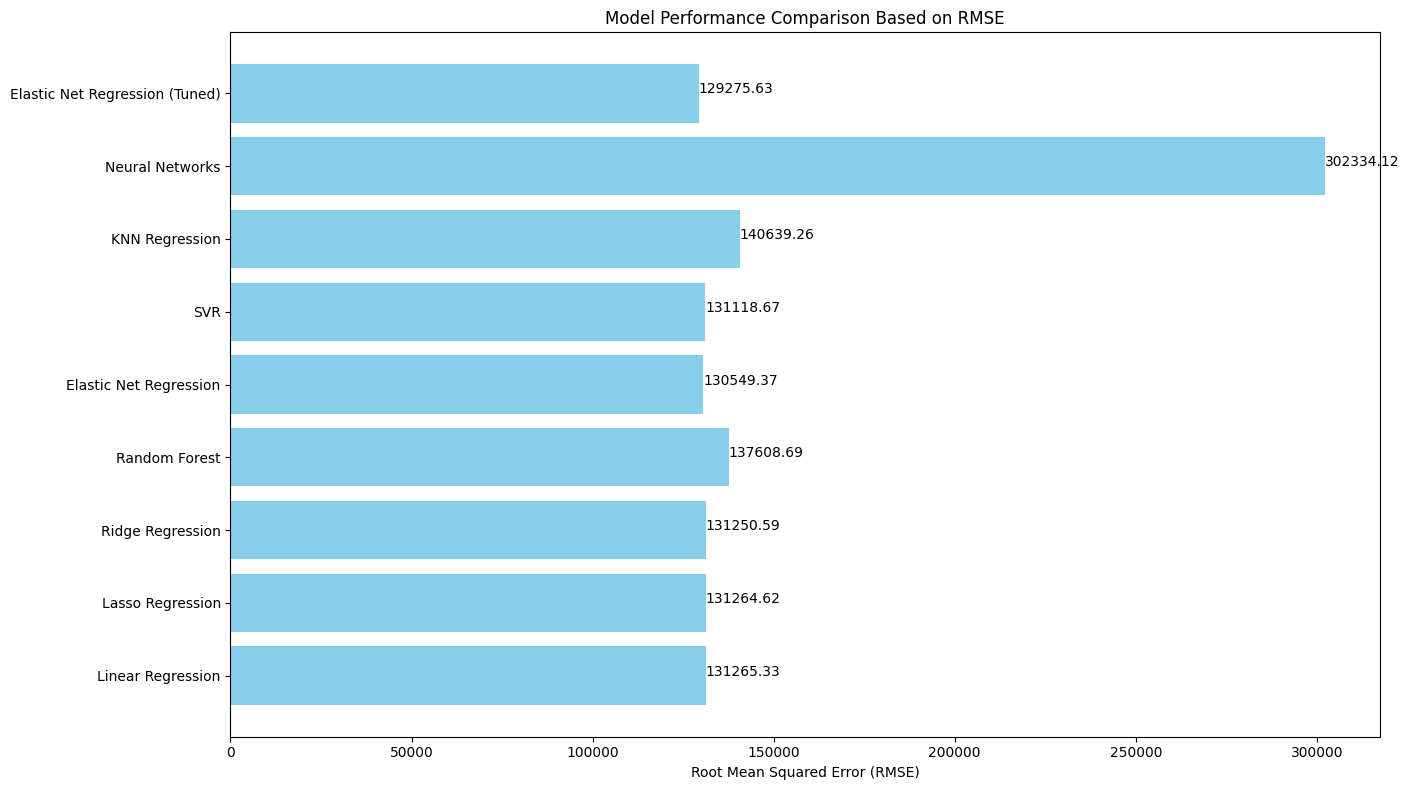

In [46]:
import matplotlib.pyplot as plt

# Update results with the tuned Elastic Net model's performance
results['Elastic Net Regression (Tuned)'] = {"MAE": None, "MSE": None, "RMSE": best_score}

# Prepare data for plotting
model_names = list(results.keys())
rmse_values = [results[model]["RMSE"] for model in model_names]

# Plotting
plt.figure(figsize=(14, 8))
plt.barh(model_names, rmse_values, color='skyblue')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.title('Model Performance Comparison Based on RMSE')
plt.tight_layout()

for index, value in enumerate(rmse_values):
    plt.text(value, index, f"{value:.2f}")

plt.show()
